<AxesSubplot:xlabel='Title'>

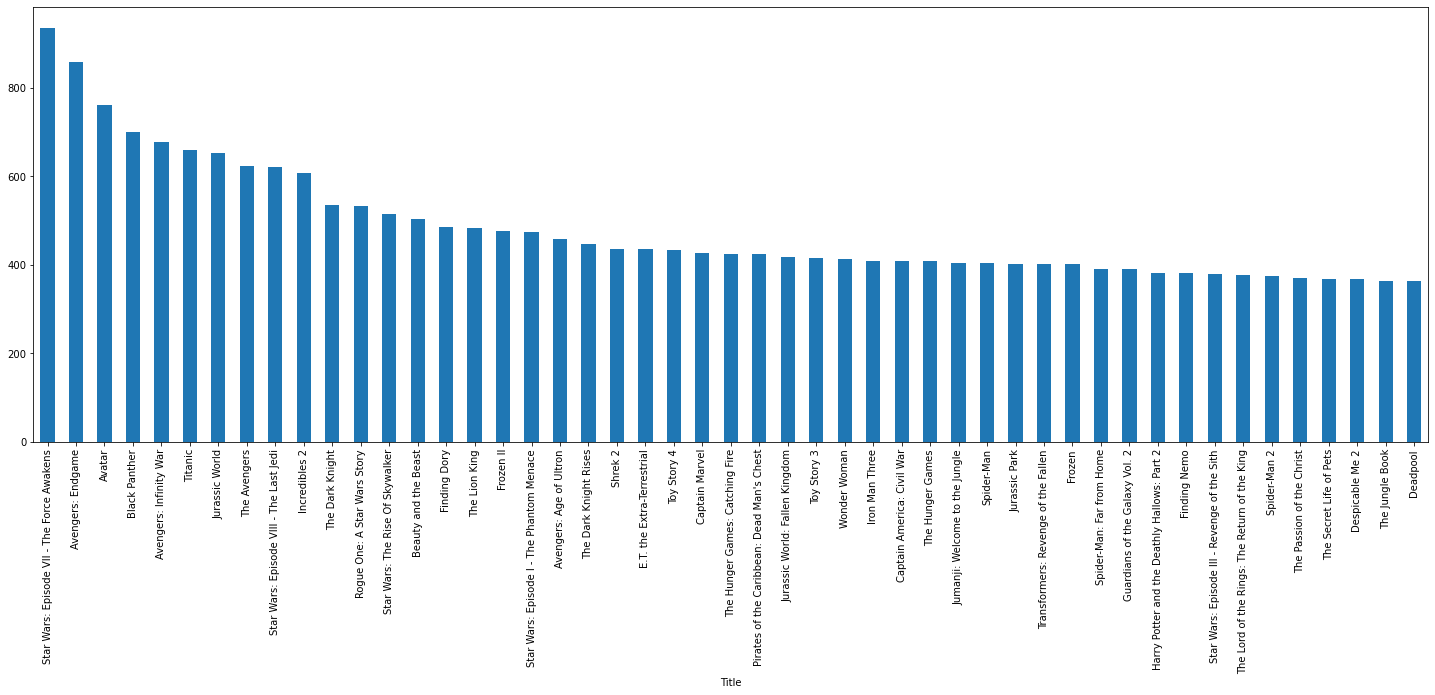

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IN_PATH = os.path.join("data", "clean", "imdb_clean.csv")

with open(IN_PATH, "r") as in_file:
    csv_reader = csv.DictReader(in_file)

    try_ = []

    for row in csv_reader:
        try_.append(row)
        
# print(try_)

status_count = {}

for row in try_:

    num_shares = float(row["GrossRevenue"])
    status_type = row["Title"] , int(row["ReleaseYear"]) , row["Genres"], int(row["Runtime"]), float(row["IMDBRating"]), int(row["Metascore"])
    
    if status_type in status_count:
        status_count[status_type] = num_shares
    else:
        status_count[status_type] = num_shares
            
# print(status_count)


my_list = list(key+(val,) for key,val in status_count.items())
# print(my_list)

sorted_list = sorted(my_list, key=lambda x: (-x[6], x[1]))

df = pd.DataFrame(sorted_list, columns=["Title", "ReleaseYear", "Genres", "Runtime", "IMDBRating", "Metascore", "GrossRevenue"]).head(50)

sorted_list2 = sorted(my_list, key=lambda x: (-x[4], -x[6]))

df2 = pd.DataFrame(sorted_list2, columns=["Title", "ReleaseYear", "Genres", "Runtime", "IMDBRating", "Metascore", "GrossRevenue"]).head(50)

sorted_list3 = sorted(my_list, key=lambda x: (-x[5], -x[6]))

df3 = pd.DataFrame(sorted_list3, columns=["Title", "ReleaseYear", "Genres", "Runtime", "IMDBRating", "Metascore", "GrossRevenue"]).head(50)

sorted_list4 = sorted(my_list, key=lambda x: (-x[3], -x[6]))

df4 = pd.DataFrame(sorted_list3, columns=["Title", "ReleaseYear", "Genres", "Runtime", "IMDBRating", "Metascore", "GrossRevenue"]).head(50)

df5 = pd.DataFrame(sorted_list, columns=["Title", "ReleaseYear", "Genres", "Runtime", "IMDBRating", "Metascore", "GrossRevenue"])

df.groupby("Title")["GrossRevenue"].mean().sort_values(ascending=False).plot.bar(figsize=(25, 8))

<AxesSubplot:xlabel='Title'>

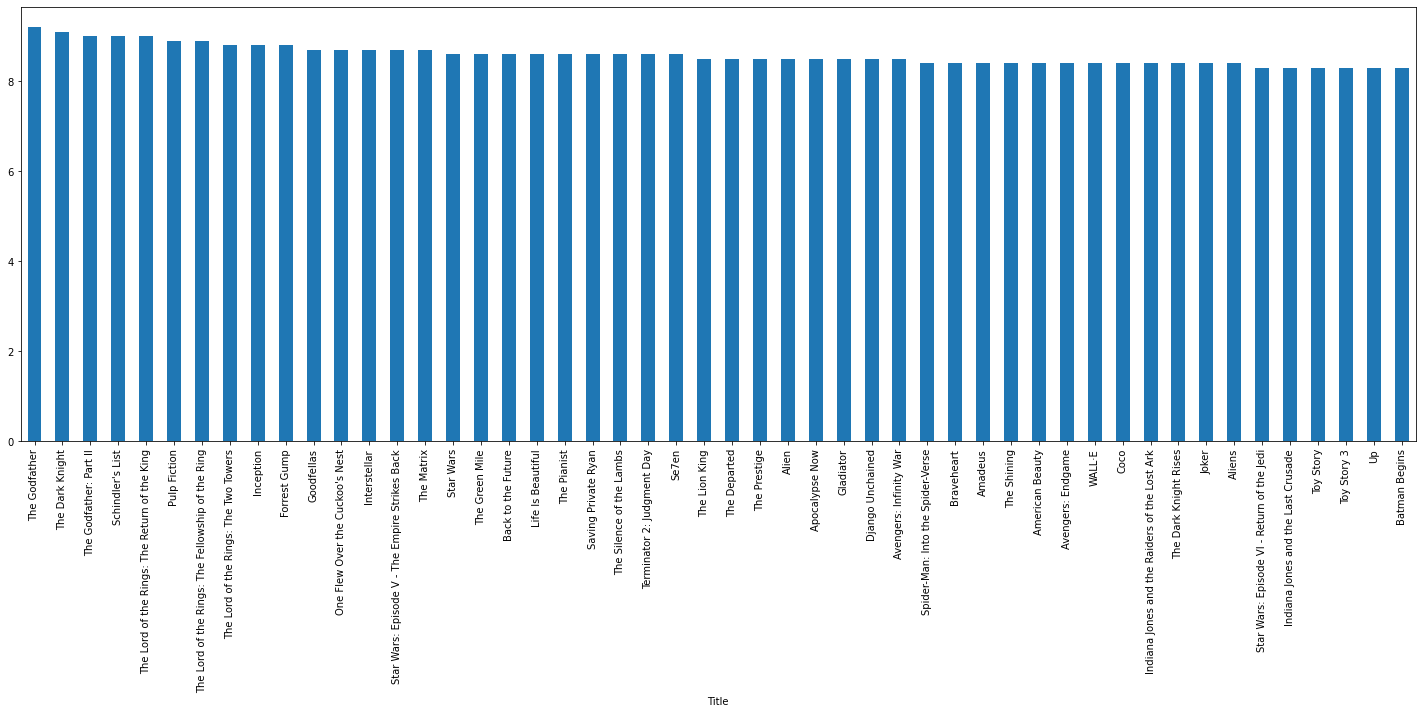

In [2]:
df2.groupby("Title")["IMDBRating"].mean().sort_values(ascending=False).plot.bar(figsize=(25, 8))

<AxesSubplot:xlabel='Title'>

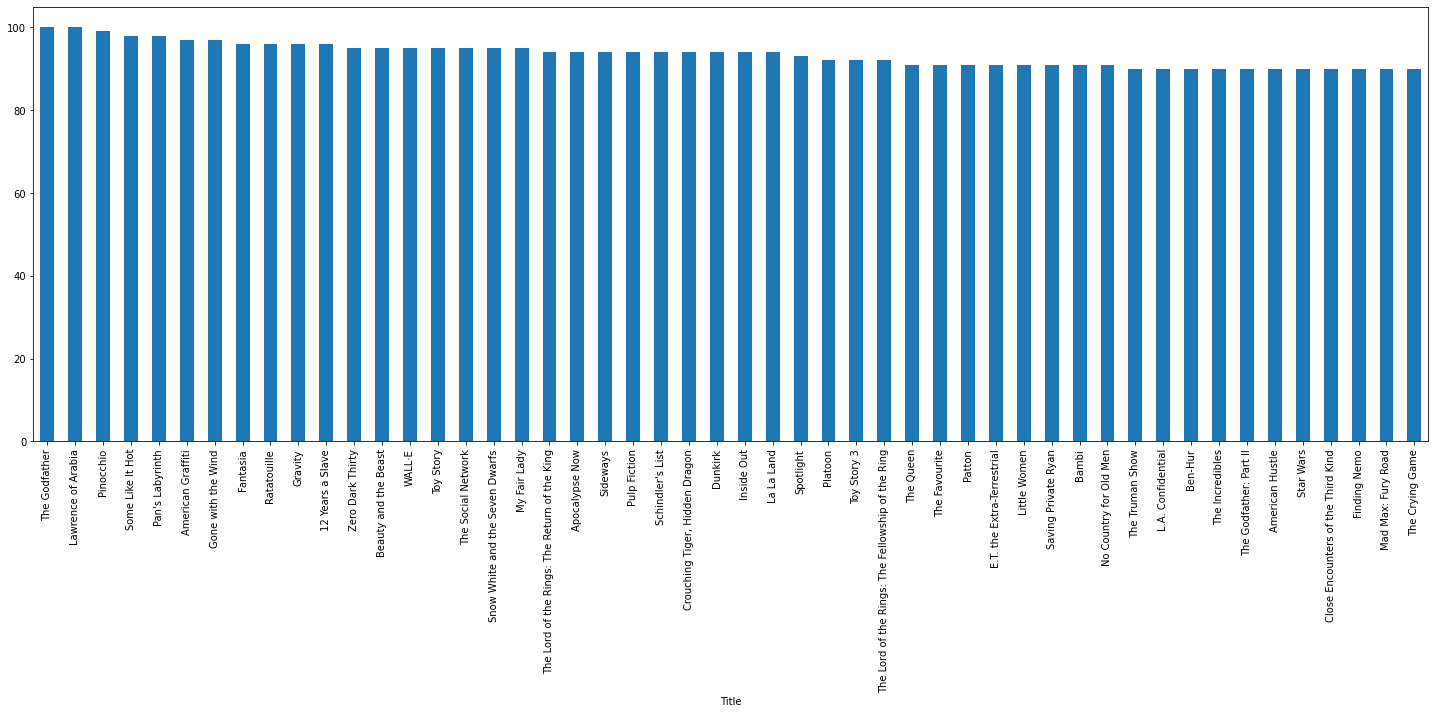

In [3]:
df3.groupby("Title")["Metascore"].mean().sort_values(ascending=False).plot.bar(figsize=(25, 8))

Metascore        59.651798
Runtime         116.009321
GrossRevenue    124.986511
dtype: float64


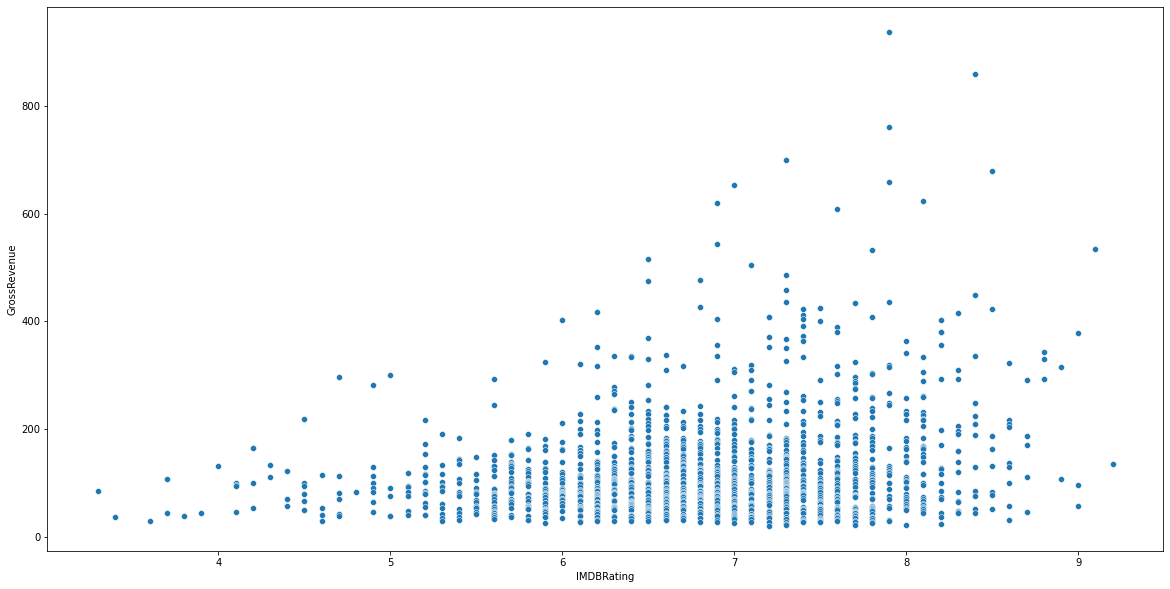

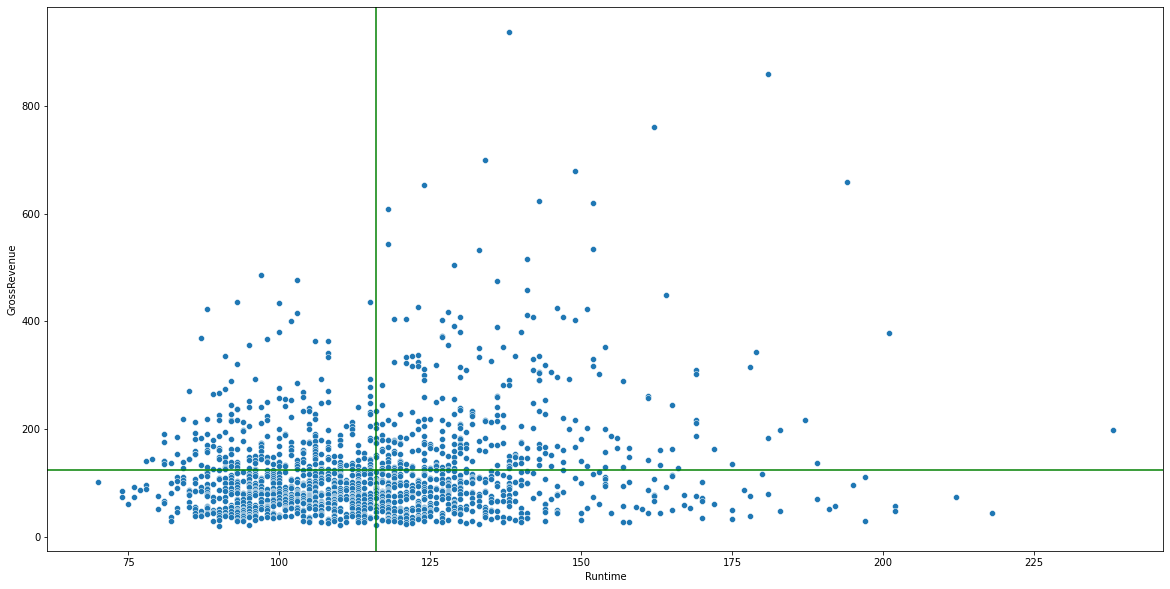

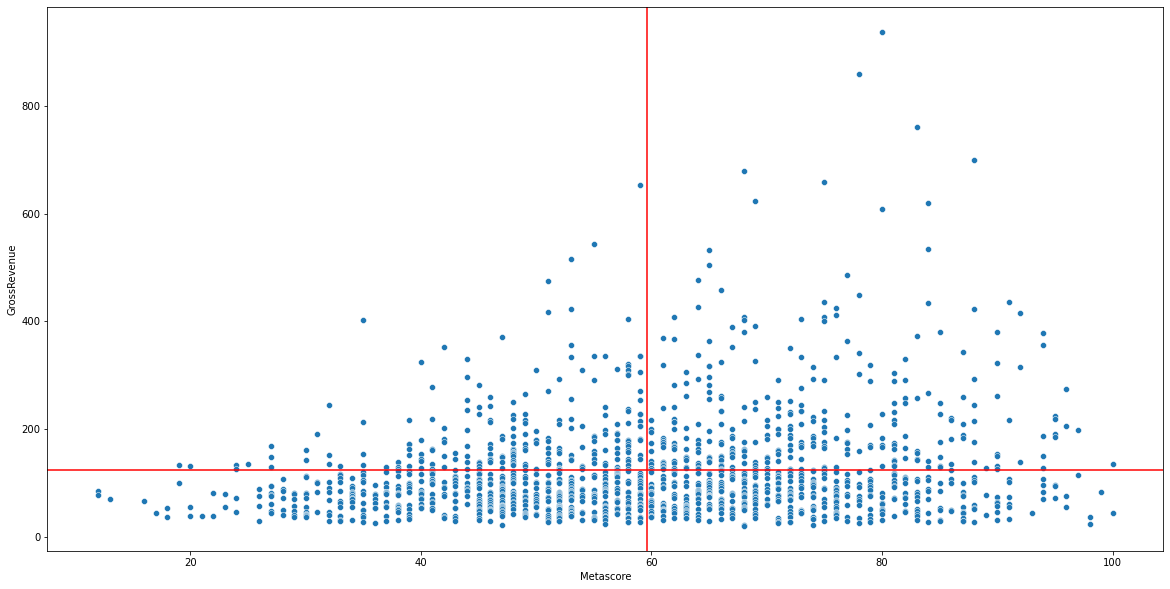

In [4]:
a = df5[['Metascore', 'Runtime', 'GrossRevenue']].mean()
print(a)

plt.figure(figsize=(20,10))
sns.scatterplot(data=df5, x='IMDBRating', y='GrossRevenue')

plt.figure(figsize=(20,10))
graph1 = sns.scatterplot(data=df5, x='Runtime', y='GrossRevenue')
graph1.axhline(124.986511, color = 'green')
graph1.axvline(116.009321, color = 'green')

plt.figure(figsize=(20,10))
graph2 = sns.scatterplot(data=df5, x='Metascore', y='GrossRevenue')
graph2.axhline(124.986511, color = 'red')
graph2.axvline(59.651798, color = 'red')